<h2>INTRODUCTION</h2>

The objective is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

<h3>Reading the DataSet</h3>

In [3]:
df=pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.tail(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


In [5]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
df.shape

(846, 19)

<h2>Data PreProcessing</h2>

To identify whether null values are present in the dataset

In [9]:
df.isnull()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

We can either replace the null values with the mean of the column or delete the rows in which null values are present

In [11]:
df.fillna(df.mean(), axis = 0, inplace = True)
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<h2>Exploratory Data Analysis</h2>

Inferences:

1.Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.

2.Mean circularity is higher for cars.

3.Mean distance_circularity is also higher for cars

4.Mean radius_ratio is higher for cars, followed by Bus. It is least for vans

5.pr.axis_aspect_ratio is has almost same distribution for car, van and buses

6.max.length_aspect_ratio is almost same for cars and vans, lower for buses

7.Mean scatter ratio is highest for cars, followed by bus and van

8.Mean elomngatedness is highest for vans folowed by bus and car

9.pr.axis_rectangularity is highest for cars, followed by bus and then vans

10.distribution of max.length_rectangularity is almost same for cars, bus and vans

11.Mean scaled variance is highest for cars followed by bus then vans

12.Mean scaled variance1 is highest for cars followed by bus then vans

13.'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.

14.'hollows_ratio' is lower for buses as compared to cars and vans
Many columns have lonmg tails indicating outliers

15.pr.axis_aspect ratio and radius ratio varies strongly +ve for van. for cars and buses it varies in small range- mostly cpuld like

16.Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship

17.Many features show high correlation indicating that we need to drop multiple features- we will use PCA for the same

In [12]:
df.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


In [13]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Let us understand the correlation between the columns of the dataset

In [14]:
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


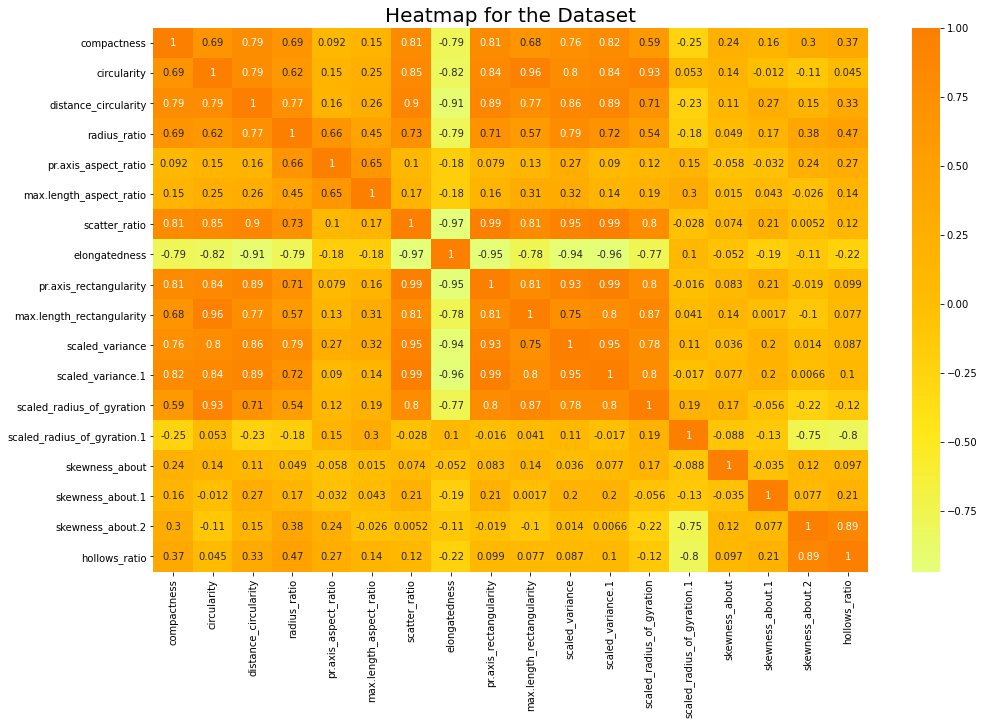

In [15]:
rcParams['figure.figsize']=(16,10)
sns.heatmap(df.corr(),annot=True,cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

We can observe that some features are highly correlated with one another.

Text(0.5, 1.0, 'Distribution plot')

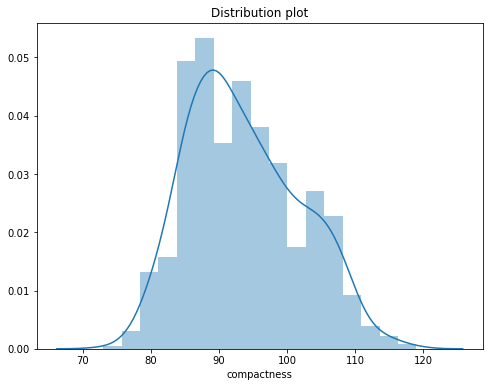

In [16]:
rcParams['figure.figsize']=(8,6)
sns.distplot(df['compactness'])
plt.title('Distribution plot')

Text(0.5, 1.0, 'Box Plot')

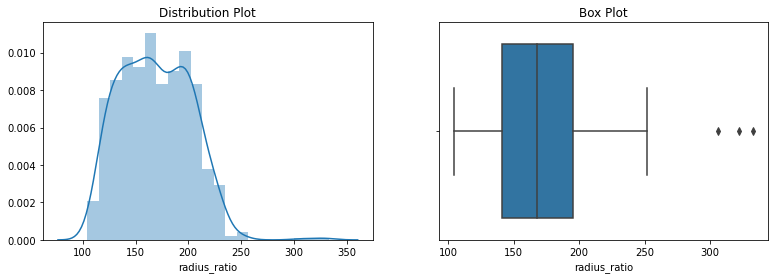

In [17]:
fig, (s1, s2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(13,4)
sns.distplot(df['radius_ratio'], ax = s1)
s1.set_title("Distribution Plot")

sns.boxplot(df['radius_ratio'], ax = s2)
s2.set_title("Box Plot")

In [18]:
q1 = np.quantile(df['radius_ratio'], 0.25)
q2 = np.quantile(df['radius_ratio'], 0.50)
q3 = np.quantile(df['radius_ratio'], 0.75)
IQR = q3 - q1

print("Quartile q1: ", q1)
print("Quartile q2: ", q2)
print("Quartile q3: ", q3)
print("Inter Quartile Range: ", IQR)

print("radius_ratio above ", df['radius_ratio'].quantile(0.75) + (1.5*IQR), "are outliers")
print("No. of outliers ", df[df['radius_ratio'] > 276]['radius_ratio'].shape[0])

Quartile q1:  141.0
Quartile q2:  168.0
Quartile q3:  195.0
Inter Quartile Range:  54.0
radius_ratio above  276.0 are outliers
No. of outliers  3


Text(0.5, 1.0, ' BoxPlot')

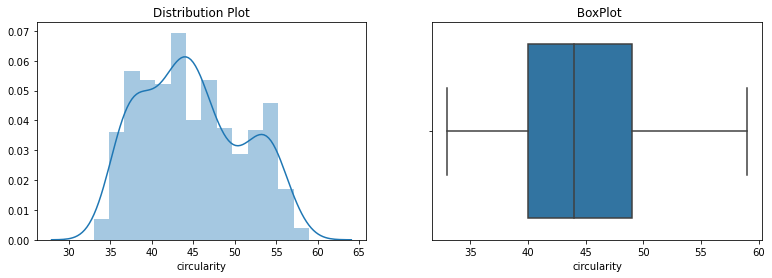

In [19]:
fig, (s1, s2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(13,4)
sns.distplot(df['circularity'], ax = s1)
s1.set_title("Distribution Plot")

sns.boxplot(df['circularity'], ax = s2)
s2.set_title(" BoxPlot")

Text(0.5, 1.0, 'Box Plot')

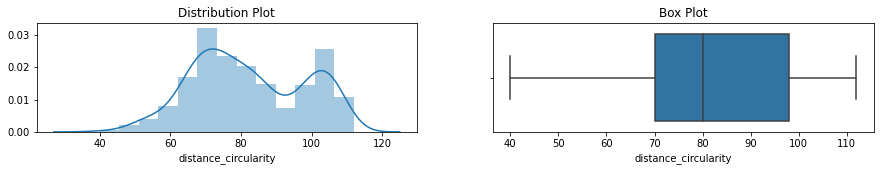

In [20]:
fig, (g1,g2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15,2)
sns.distplot(df['distance_circularity'], ax = g1)
g1.set_title("Distribution Plot")

sns.boxplot(df['distance_circularity'], ax = g2)
g2.set_title("Box Plot")

Text(0.5, 1.0, 'Distribution plot')

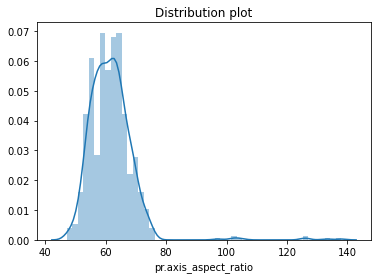

In [21]:
rcParams['figure.figsize']=(6,4)
sns.distplot(df['pr.axis_aspect_ratio'])
plt.title('Distribution plot')

Text(0.5, 1.0, 'Box plot')

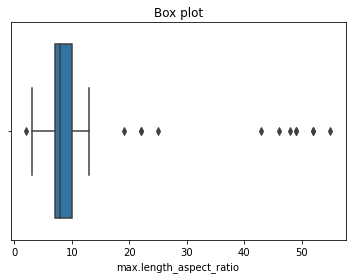

In [22]:
rcParams['figure.figsize']=(6,4)
sns.boxplot(df['max.length_aspect_ratio'])
plt.title('Box plot')

Text(0.5, 1.0, 'Box Plot')

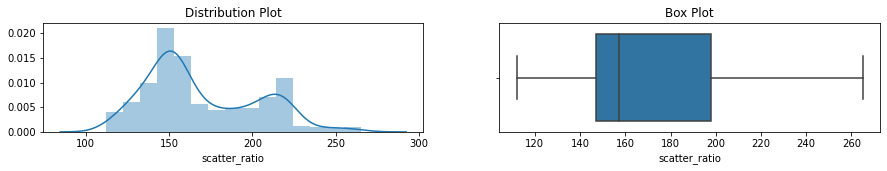

In [23]:
fig,(g1,g2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15,2)
sns.distplot(df['scatter_ratio'], ax = g1)
g1.set_title("Distribution Plot")

sns.boxplot(df['scatter_ratio'], ax = g2)
g2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

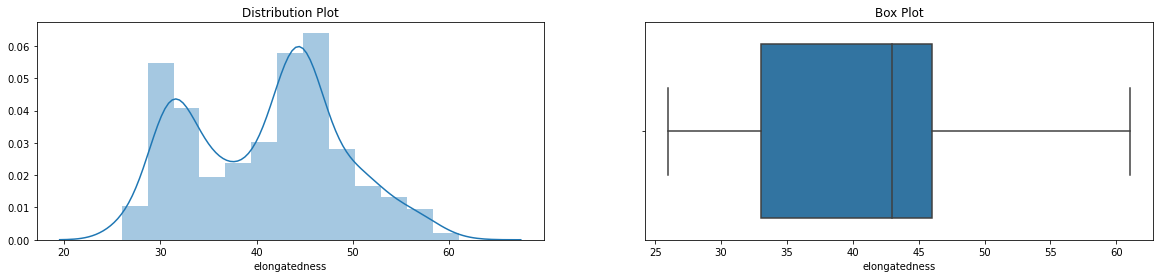

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

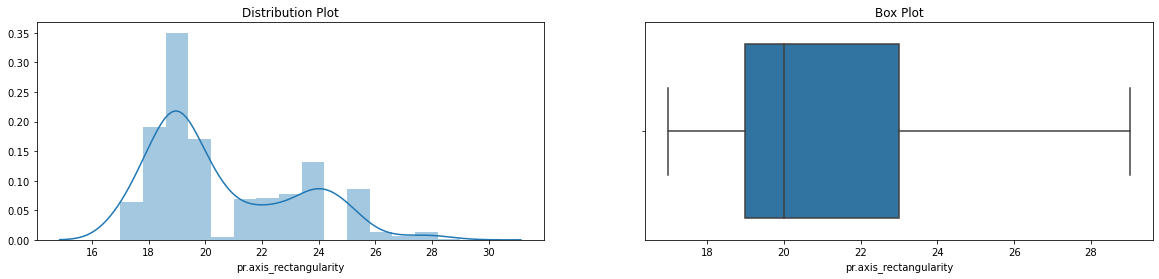

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Swarm Plot')

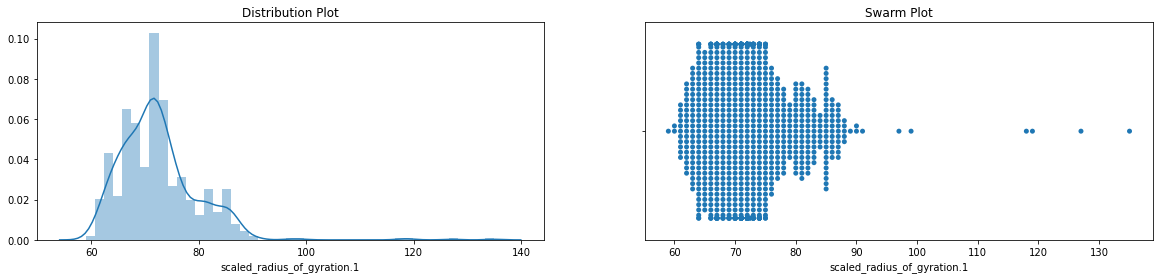

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.swarmplot(df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Swarm Plot")

Text(0.5, 1.0, 'Box plot')

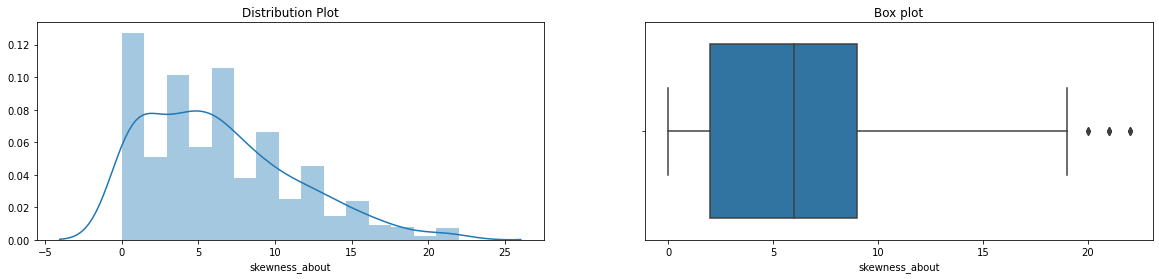

In [27]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['skewness_about'],ax=ax2)
ax2.set_title("Box plot")

Text(0.5, 1.0, 'Box Plot')

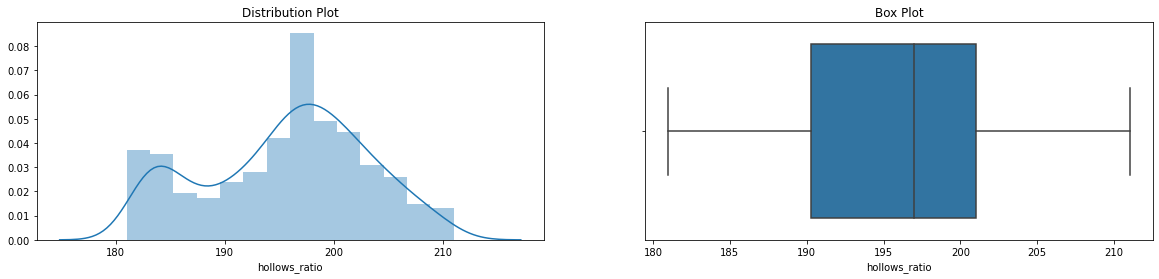

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

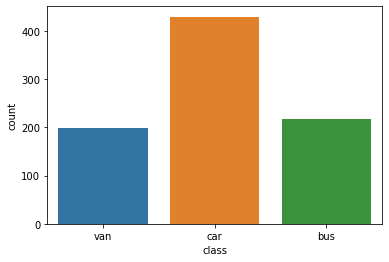

In [29]:
sns.countplot(df['class'])

<h2>PCA</h2>

In [32]:
x_train=df.drop('class',axis=1)
x_target=df['class']

In [34]:
x_train.shape

(846, 18)

In [35]:
x_target.shape

(846,)

In [36]:
sc=StandardScaler()

In [37]:
sc.fit(x_train)

StandardScaler()

In [42]:
from scipy.stats import zscore
x_train_std=x_train.apply(zscore)

Now we have to calculate the covariance so as to understand which features will be converted into principal components.

In [43]:
cov_matrix = np.cov(x_train_std.T)

In [44]:
print(cov_matrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [45]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.75259459e-01  1.27010856e-01  1.19874162e-01 -7.83109159e-02
  -6.93062475e-02  1.44650156e-01  4.53755811e-01  5.64713964e-01
   4.83554183e-01  2.61221731e-01 -4.64498989e-02  1.34446607e-02
  -1.59324486e-01  6.56773512e-03 -5.98448138e-02 -1.62328028e-03
  -6.05262978e-02 -3.85955867e-04]
 [ 2.93392341e-01 -1.26217125e-01  2.51835016e-02 -1.87525528e-01
   8.50186000e-02 -3.00733370e-01 -2.48092973e-01  1.79295222e-01
   1.45395937e-02 -9.75432534e-02 -2.55383379e-03 -1.97520615e-01
  -1.46192222e-02 -7.98780902e-04  3.96666736e-01  7.62595458e-02
  -3.40071641e-01 -5.85708475e-01]
 [ 3.04556452e-01  7.26862818e-02  5.60058748e-02  7.07959698e-02
  -4.07236757e-02 -1.38488042e-01  7.27989653e-02 -4.36047225e-01
   1.67573501e-01  2.08494817e-01 -7.05942549e-01 -6.37015997e-03
   2.33090309e-01 -3.71748194e-03 -1.51057100e-01 -3.10533715e-02
   6.61582176e-02 -1.58392894e-01]
 [ 2.67593206e-01  1.89635192e-01 -2.75066087e-01  4.22567515e-02
   4.60157077e-02  

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 18)
pca.fit(x_train_std)

PCA(n_components=18)

In [50]:
print(pca.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

Lets reduce the number of components from 18 to 6

In [51]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 6)
pca1.fit(x_train_std)

PCA(n_components=6)

In [52]:
print(pca1.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

<h2>SVM</h2>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_train_std,x_target,test_size=0.33)

In [60]:
from sklearn.svm import SVC
svc_model1 = SVC(C= .1, kernel='linear', gamma= 1)
svc_model1.fit(X_train, y_train)
prediction = svc_model1.predict(X_test)

In [61]:
print(accuracy_score(prediction,y_test))

0.9321428571428572


In [65]:
from sklearn.svm import SVC
svc_model2 = SVC(C= .1, kernel='rbf', gamma= 1)
svc_model2.fit(X_train, y_train)
prediction = svc_model2.predict(X_test)

In [66]:
print(accuracy_score(prediction,y_test))

0.5071428571428571


In [68]:
from sklearn.svm import SVC
svc_model3 = SVC(C= .1, kernel='poly', gamma= 1)
svc_model3.fit(X_train, y_train)
prediction = svc_model3.predict(X_test)

In [69]:
print(accuracy_score(prediction,y_test))

0.9428571428571428


Among the three kernels , SVM with polynomial kernel has the most accuracy.

<h2>LOGISTIC REGRESSION</h2>

In [73]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [75]:
LR.fit(X_train,y_train)

LogisticRegression()

In [76]:
yhat=LR.predict(X_test)

In [77]:
accuracy_score(yhat,y_test)

0.9464285714285714

In [78]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         bus       0.96      0.91      0.94        79
         car       0.94      0.96      0.95       139
         van       0.94      0.95      0.94        62

    accuracy                           0.95       280
   macro avg       0.95      0.94      0.94       280
weighted avg       0.95      0.95      0.95       280



In [79]:
print(confusion_matrix(yhat,y_test))

[[ 72   6   1]
 [  2 134   3]
 [  1   2  59]]


<h2>Naive Bayes</h2>

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
predicted = nb_model.predict(X_test)

In [82]:
print(confusion_matrix(predicted,y_test))

[[10  1  2]
 [17 98  5]
 [48 43 56]]


In [84]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

         bus       0.13      0.77      0.23        13
         car       0.69      0.82      0.75       120
         van       0.89      0.38      0.53       147

    accuracy                           0.59       280
   macro avg       0.57      0.66      0.50       280
weighted avg       0.77      0.59      0.61       280



In [85]:
print(accuracy_score(predicted,y_test))

0.5857142857142857


<h2>CONCLUSION</h2>

SVM with polynomial kernel has given us the highest accuracy  among other models after DIMENSIONALITY REDUCTION has been performed.